In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

###

一個channel，所以(28,28)-->(28,28,1)
p.s.channel = RGB各一個矩陣

In [6]:
x_train = x_train.reshape(60000,28,28,1) / 255

In [7]:
x_test = x_test.reshape(10000,28,28,1) / 255

In [8]:
x_train[67].shape

(28, 28, 1)

In [9]:
y_train[34]

0

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 讀入必要的函式

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

### 1.打造函數學習機

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(16, (3,3), padding='same',
                 input_shape=(28,28,1),
                activation='relu'))

In [16]:
#輸出16 個 28x28 矩陣
#事實上是(28, 28, 16)

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
#(14,14,16)
#記分板被2x2切成一半

In [23]:
model.add(Conv2D(32, (3,3), padding='same', 
          activation='relu'))

In [24]:
#output (14, 14, 32)

In [27]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
#output (7, 7,32)

In [29]:
model.add(Conv2D(64, (3,3), padding='same', 
                activation='relu'))

In [30]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
model.add(Flatten())

In [32]:
model.add(Dense(54, activation='relu'))

In [33]:
model.add(Dense(10, activation='softmax'))

### 看一下我們的神經網路

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [39]:
# 3*3(權重) + 1 (bias)
#第一層狀況
print((3*3+1)*16)
#第二層狀況
print((3*3*16+1)*32)

160
4640


In [41]:
model.compile(loss='mse', optimizer=SGD(lr=0.087),metrics=['accuracy'])

### 2. 訓練模型

In [42]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 34s 571us/sample - loss: 0.0897 - accuracy: 0.1623
Epoch 2/12
60000/60000 [==============================] - 31s 524us/sample - loss: 0.0882 - accuracy: 0.4169
Epoch 3/12
60000/60000 [==============================] - 31s 509us/sample - loss: 0.0774 - accuracy: 0.5553
Epoch 4/12
60000/60000 [==============================] - 32s 528us/sample - loss: 0.0302 - accuracy: 0.8192
Epoch 5/12
60000/60000 [==============================] - 31s 525us/sample - loss: 0.0172 - accuracy: 0.8903
Epoch 6/12
60000/60000 [==============================] - 32s 529us/sample - loss: 0.0131 - accuracy: 0.9161
Epoch 7/12
60000/60000 [==============================] - 32s 534us/sample - loss: 0.0109 - accuracy: 0.9302
Epoch 8/12
60000/60000 [==============================] - 33s 543us/sample - loss: 0.0094 - accuracy: 0.9395
Epoch 9/12
60000/60000 [==============================] - 33s 544us/sample - loss: 0.0084 - accuracy: 0.9

### 3.預測模型結果

In [44]:
result = model.predict_classes(x_test)

In [46]:
def my_predict(n):
    print('我可愛的 CNN 預測是', result[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

我可愛的 CNN 預測是 6


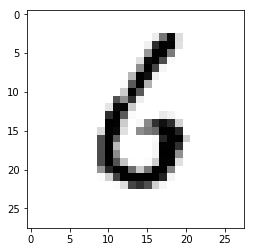

In [47]:
my_predict(50)

In [48]:
from ipywidgets import interact_manual

In [49]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [50]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 304us/sample - loss: 0.0059 - accuracy: 0.9607


In [51]:
loss, acc = score

In [54]:
print('測試資料正確率為', acc)

測試資料正確率為 0.9607


### 4.存取模型結果

In [55]:
model.save('myCNNmodel.h5')